<a href="https://colab.research.google.com/github/vemulaprasanthi/Machine_Learning/blob/main/Exp11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Silhouette Score for K-Means: 0.1751
Silhouette Score for GMM (EM Algorithm): 0.1597


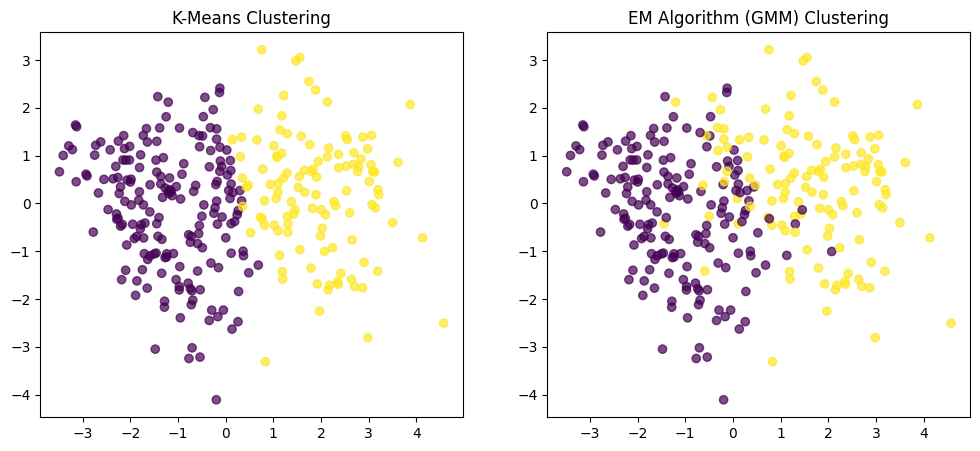

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# Load the Heart Disease dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
column_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
                'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
df = pd.read_csv(url, names=column_names, na_values="?")

# Handle missing values (drop rows with missing values)
df.dropna(inplace=True)

# Separate features and target variable
X = df.drop(columns=['target'])

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-Means Clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Apply EM Algorithm (Gaussian Mixture Model)
gmm = GaussianMixture(n_components=2, random_state=42)
gmm_labels = gmm.fit_predict(X_scaled)

# Evaluate clustering performance using silhouette score
kmeans_silhouette = silhouette_score(X_scaled, kmeans_labels)
gmm_silhouette = silhouette_score(X_scaled, gmm_labels)

# Print the silhouette scores
print(f"Silhouette Score for K-Means: {kmeans_silhouette:.4f}")
print(f"Silhouette Score for GMM (EM Algorithm): {gmm_silhouette:.4f}")

# Visualizing Clusters using PCA (for 2D plotting)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(12, 5))

# Plot K-Means clusters
plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis', alpha=0.7)
plt.title("K-Means Clustering")

# Plot EM (GMM) clusters
plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=gmm_labels, cmap='viridis', alpha=0.7)
plt.title("EM Algorithm (GMM) Clustering")

plt.show()
